In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [142]:
df1 = load_boston()

In [143]:
x = pd.DataFrame(df1.data)

In [144]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [145]:
y = pd.DataFrame(df1.target)

In [146]:
y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [147]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [148]:
x.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

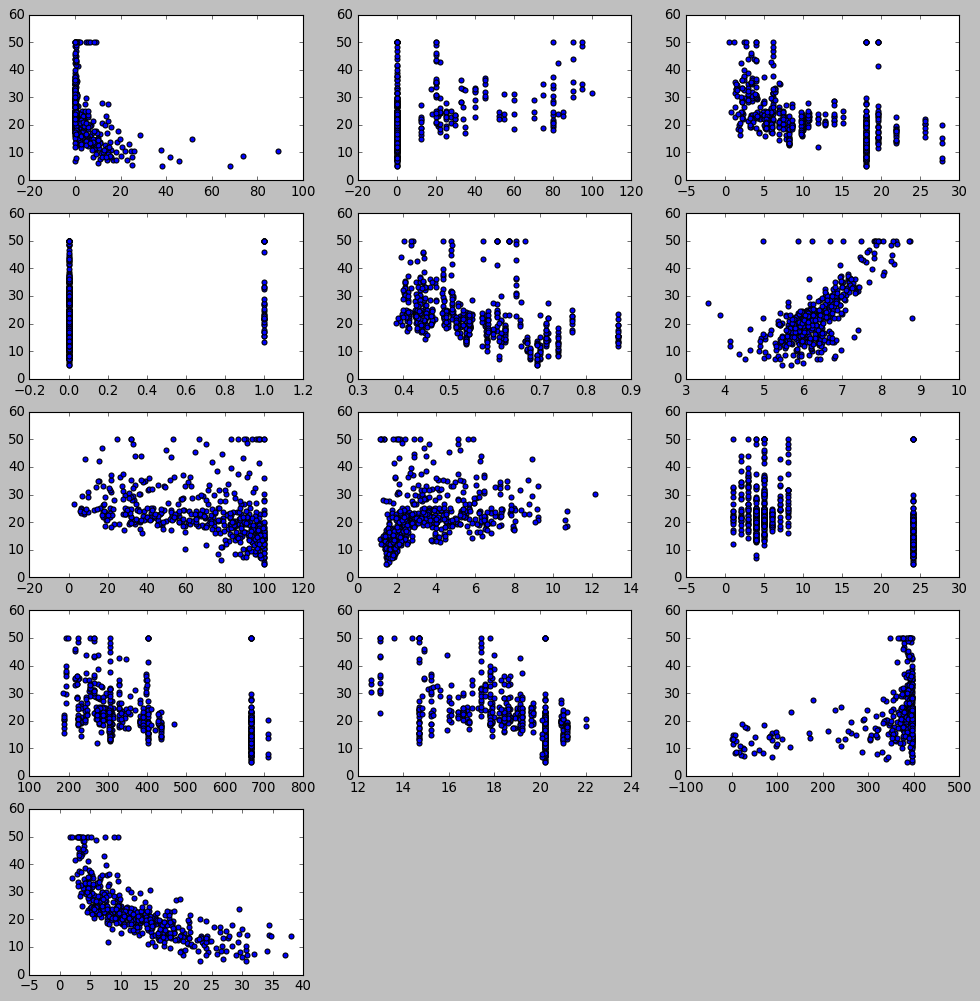

In [149]:
plt.style.use("classic")
fig = plt.figure(figsize=(15,15))
for i in range(13):
    ax = plt.subplot(5,3, i+1 )
    ax.scatter(x.iloc[:,i], y)

In [150]:
sc = StandardScaler()

In [151]:
x = sc.fit_transform(x)

In [152]:
x = pd.DataFrame(x)

In [153]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


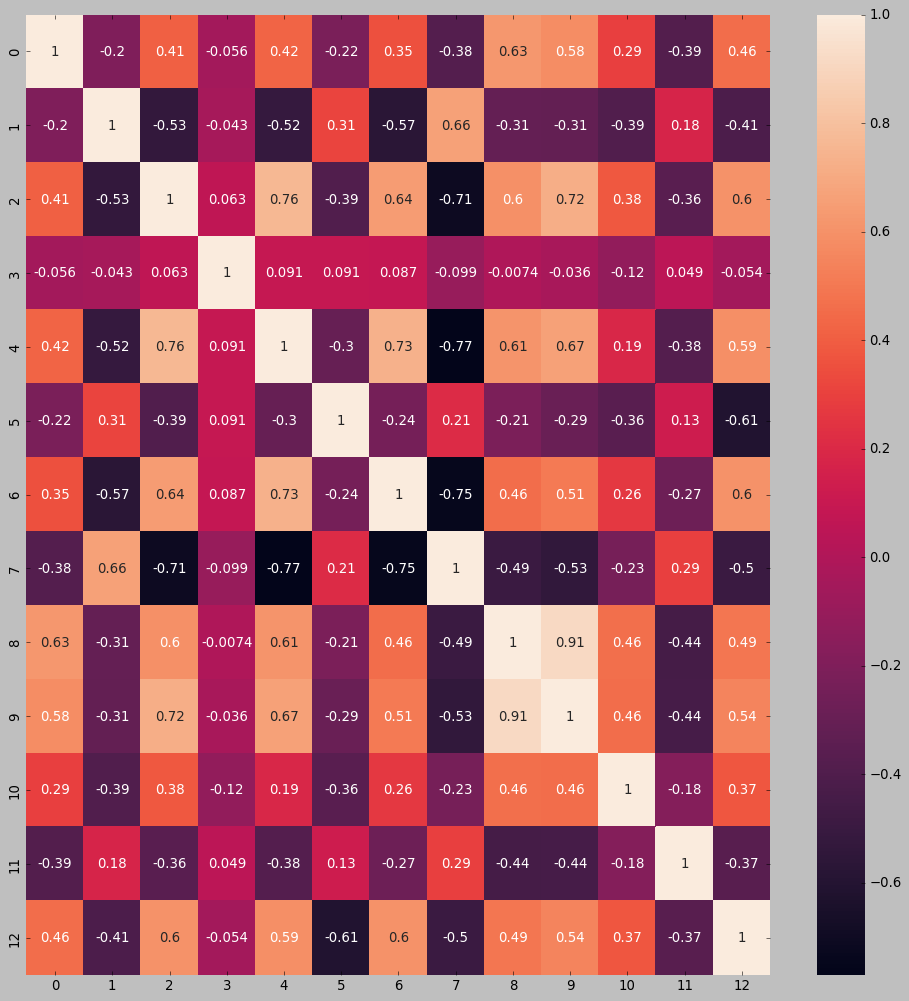

In [154]:
plt.figure(figsize=(15,15))
sns.heatmap(x.corr(), annot=True)

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [157]:
vif = []
for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x.values, i))

In [158]:
pd.DataFrame({"Columns":list(range(0,x.shape[1])),"VIF":vif})

,Columns,VIF
0,0,1.792192
1,1,2.298758
2,2,3.991596
3,3,1.073995
4,4,4.393720
5,5,1.933744
6,6,3.100826
7,7,3.955945
8,8,7.484496
9,9,9.008554


In [159]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [163]:
x.iloc[:,8]*x.iloc[:,9]

0      0.655171
1      0.856886
2      0.856886
3      0.832819
4      0.832819
         ...   
501    0.789431
502    0.789431
503    0.789431
504    0.789431
505    0.789431
Length: 506, dtype: float64

In [164]:

x.drop([9], axis = 1, inplace = True)

In [165]:
x.head()

,0,1,2,3,4,5,6,7,8,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,0.113032,0.441052,-1.026501


In [166]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [167]:
x_train[0:5]

,0,1,2,3,4,5,6,7,8,10,11,12
376,1.358597,-0.487722,1.015999,-0.272599,1.004680,0.519097,0.879239,-1.164722,1.661245,0.806576,0.069579,1.484011
30,-0.288921,-0.487722,-0.437258,-0.272599,-0.144217,-0.814384,0.907687,0.208191,-0.637962,1.176466,0.038331,1.394300
427,3.962320,-0.487722,1.015999,-0.272599,1.073787,-0.117726,0.360054,-0.918481,1.661245,0.806576,-3.704353,0.261696
436,1.257678,-0.487722,1.015999,-0.272599,1.600725,0.251261,0.879239,-0.852072,1.661245,0.806576,-3.609292,0.756509
157,-0.278125,-0.487722,1.231945,-0.272599,0.434551,0.937946,1.025037,-0.911636,-0.523001,-1.736418,0.074075,-1.130230


In [168]:
y[0:5]

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [169]:
print("Training features sample ",x_train.shape)
print("Testing feature sample ",x_test.shape)
print("Training target sample ",y_train.shape)
print("Testing taget sample",y_test.shape)

Training features sample  (379, 12)
Testing feature sample  (127, 12)
Training target sample  (379, 1)
Testing taget sample (127, 1)


In [219]:
from sklearn.linear_model import Ridge

In [220]:
lr = Ridge()

In [221]:
lr.fit(x_train, y_train)

Ridge()

In [222]:
lr.score(x_test, y_test)

0.735388383425279

In [223]:
from sklearn.preprocessing import PolynomialFeatures

In [224]:
po = PolynomialFeatures(degree=2)

In [225]:
x_train_ = po.fit_transform(x_train)
x_test_ = po.fit_transform(x_test)

In [226]:
lr.fit(x_train_, y_train)

Ridge()

In [227]:
lr.score(x_test_, y_test)

0.8620266830525868

In [257]:
po = PolynomialFeatures(degree=2)

In [258]:
x_train_ = po.fit_transform(x_train)
x_test_ = po.fit_transform(x_test)

In [259]:
la = Lasso()

In [260]:
la.fit(x_train_, y_train)

Lasso()

In [261]:
la.score(x_test_, y_test)

0.7391029246051559

In [267]:
lr = LinearRegression()

In [268]:
lr.fit(x_train_, y_train)

LinearRegression()

In [270]:
lr.score(x_test_, y_test)

0.8628985752893594